### Задание 7. Исполнитель: Филатов

Обучить модели бинарной логистической регрессии на всех парах классов MNIST.

Визуализировать матрицу ковариаций для признаков, визуалитзировать наиболее значимые зависимости на признаковом пространстве.

### Part I. Importing necessary packages

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import tqdm

import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import DataLoader

from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor, Compose, Resize
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from itertools import combinations
from sklearn.metrics import accuracy_score

sns.set(style='whitegrid')

### Part II. Data preparation

In [19]:
tasks = [i for i in combinations(range(10), 2)]

In [50]:
train_dataset = MNIST('', download=True, train=True, transform=ToTensor())
test_dataset = MNIST('', download=True, train=False, transform=ToTensor())

train_dataset.data = (train_dataset.data / 255).flatten(1, 2).numpy() 
test_dataset.data = (test_dataset.data / 255).flatten(1, 2).numpy() 
new_train_y = train_dataset.targets.numpy()
new_test_y = test_dataset.targets.numpy()

In [21]:
ids4sample = []
for i in range(10):
    ids4sample.append(np.where(new_train_y == i)[0][:3])

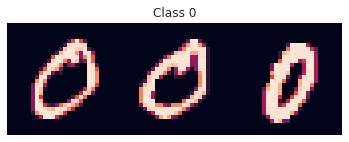

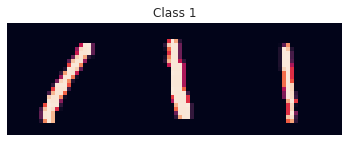

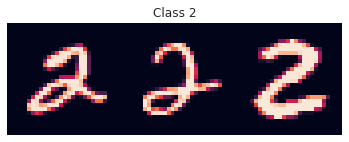

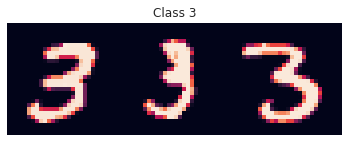

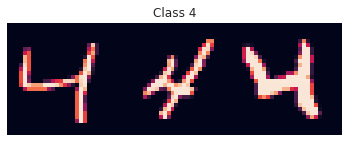

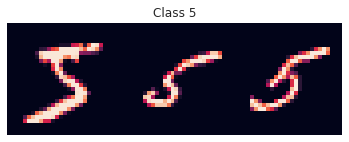

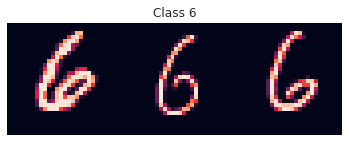

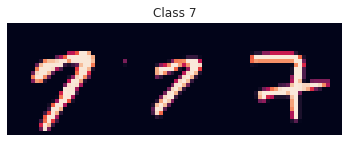

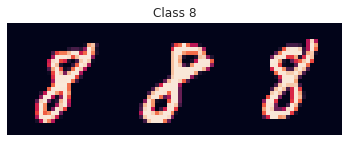

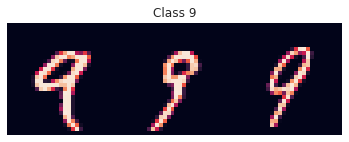

In [48]:
for i in range(10):
    plt.imshow(np.concatenate(train_dataset.data[ids4sample[i]].reshape(-1, 28, 28), axis=1))

    plt.title(f"Class {i}")
    plt.axis("off")
    plt.show()

### Part III. Training

In [52]:
lm = LogisticRegression(n_jobs=-1)
coefs =  []
accs =  []
for task in tqdm.tqdm(tasks):
    y1, y2 = task
    train_ids = np.where((new_train_y == y1) | (new_train_y == y2))[0]
    test_ids = np.where((new_test_y == y1) | (new_test_y == y2))[0]
    X_train = train_dataset.data[train_ids]
    X_test = test_dataset.data[test_ids]
    new_train_targets = new_train_y[train_ids] == y1
    new_test_targets = new_test_y[test_ids] == y1

    lm.fit(X_train, new_train_targets)
    accs.append(accuracy_score(lm.predict(X_test), new_test_targets))
    coefs.append(lm.coef_.reshape(28, 28))

100%|██████████| 45/45 [17:26<00:00, 23.25s/it]


### Part IV. Analysis

Covariation analysis

In [53]:
matrix = np.cov(train_dataset.data, rowvar=False)

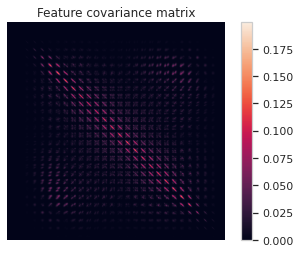

In [54]:
plt.imshow(abs(matrix))
plt.colorbar()
plt.axis("off")
plt.title("Feature covariance matrix")
plt.show()

In [57]:
pixels = range(0, 784, 100)

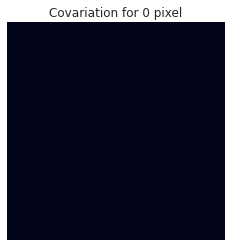

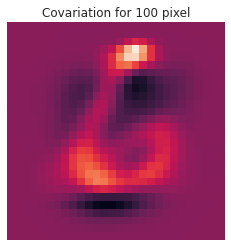

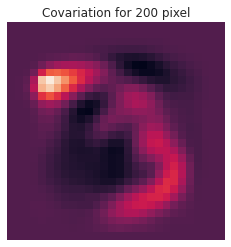

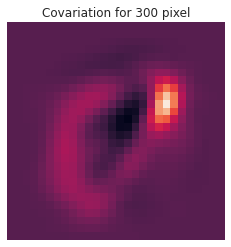

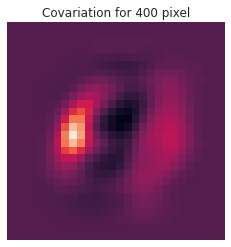

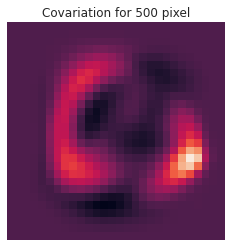

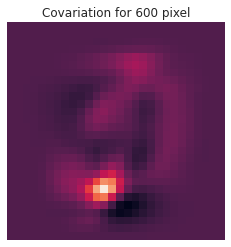

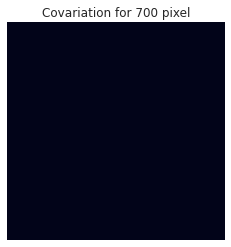

In [58]:
for pixel in pixels:
    plt.title(f"Covariation for {pixel} pixel")
    plt.imshow(matrix[pixel].reshape(-1, 28))
    plt.axis("off")
    plt.show()

Здесь видно, что в основном коррелируют значения пикселей, которые находятся близко к друг другу + виды паттерны цифры, с которыми пиксели коррелируют. Например, 200 пиксель отличает тройку.

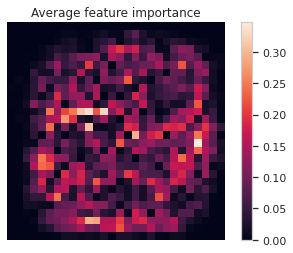

In [67]:
plt.imshow(np.abs(np.array(coefs).mean(0)))
plt.axis("off")
plt.title("Average feature importance")
plt.colorbar()
plt.show()

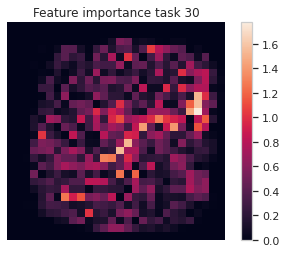

In [69]:
plt.imshow(np.abs(np.array(coefs)[30]))
plt.axis("off")
plt.title("Feature importance task 30")
plt.colorbar()
plt.show()

Из анализа видно, что наиболее значимы пиксели в центральной области + многие пиксели в области не задействованы.

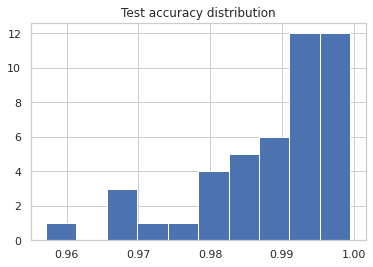

In [63]:
plt.hist(accs)
plt.title("Test accuracy distribution")
plt.show()